# 데이터 불러오기

## 라이브러리

In [1]:
# gb_module.py

# 주요 패키지 불러오기

import pandas as pd
import numpy as np
import csv

from tqdm import tqdm
import time

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from adjustText import adjust_text

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import gb_module

# 그래프에서 한글 표시를 위한 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕으로 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호가 정상 표시되도록 설정

In [2]:
# 그래프 선명하게
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'

## 데이터 불러오기
- gb_df
- dtm 파일

In [3]:
sent = pd.read_excel('data/1_gb_sent_1.xlsx')
r = pd.read_excel('data/2_r_ho_1.xlsx').drop('ho_no', axis=1)
ho = pd.read_excel('data/3_ho_grid_1.xlsx')

In [4]:
def combine_to_basic_df(sent, r, ho):
    '''
    # 개벽 데이터 정보 결합 -> 분석의 기본 df 생성
    '''
    
    sent_r = pd.merge(sent, r, left_on = 'r_no', right_on = 'r_id', how = 'inner')
    sent_rho = pd.merge(sent_r, ho, left_on = 'ho_no', right_on = 'ho_id', how = 'inner')

    gb_df = sent_rho[['sent_id',  'sent_raw',  'sent_split',  'r_no',  'title',  'writer',  'w_new',  'ho_no',  'year',  'month',  'grid_1']]
    return gb_df

In [5]:
# 기본 데이터프레임 생성
gb_df = combine_to_basic_df(sent, r, ho)
print(gb_df.shape)
gb_df

(34030, 11)


,sent_id,sent_raw,sent_split,r_no,title,writer,w_new,ho_no,year,month,grid_1
0,1,創刊辭,창간 辭,1,創刊辭,-,uk01,1,1920,6,01q
1,2,强者도 부르짖고 弱者도 부르짖으며 優者도 부르짖고 劣者도 부르짖도다,강자 약자 優者 劣者,1,創刊辭,-,uk01,1,1920,6,01q
2,3,東西南北 四海八方이 다같이 소리中에 묻혀 있도다,동서 남북 사해 팔방 소리,1,創刊辭,-,uk01,1,1920,6,01q
3,4,霹靂이냐 地震이냐 神籟이냐 魔哭이냐 우리는 아즉 이 소리의 正邪를 判斷할 수 없도다,소리 판단,1,創刊辭,-,uk01,1,1920,6,01q
4,5,左右間 多數가 渴仰하고 多數가 要求하는 人民의 소리임은 明白하도다,좌우 間 다수 갈앙 다수 요구 인민 소리 명백,1,創刊辭,-,uk01,1,1920,6,01q
...,...,...,...,...,...,...,...,...,...,...,...
34025,34026,어떠케 되엿던지 만약 미국과 영국간에 전쟁이 生起인다면 영국의 또미니온인 캐나다는 ...,미국 영국 전쟁 生起 영국 캐나다 미국 양식 힘 영국,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,쇠뫼 譯,김철산,72,1926,8,24q
34026,34027,이 비밀은 여러분과 나 외에 또 政客 셋이 알고 잇음니다,비밀 정객,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,쇠뫼 譯,김철산,72,1926,8,24q
34027,34028,그것은 미국과 영국과 캐나다임니다,미국 영국 캐나다,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,쇠뫼 譯,김철산,72,1926,8,24q
34028,34029,미국의 물질적 권력은 대개 이러함니다,미국 물질 권력,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,쇠뫼 譯,김철산,72,1926,8,24q


In [6]:
dtm50_df = pd.read_csv('result/gb_030_dtm50_df.txt', sep='\t', index_col=0)
dtm50_df

,사회,朝鮮,主義,사람,생활,민족,계급,운동,사상,自己,...,생산,意識,문명,발달,개조,역사,생명,세력,목적,현대
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34025,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34026,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34027,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34028,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 구간-단어 행렬로 전환

In [7]:
def transform_to_gtm(df, grid_col, dtm): # 매개변수: df(gb_df), 구간 정보 열(문자열 형태로), dtm50_df
    '''
    # 문서-단어 행렬(dtm)을 구간-단어 행렬(gtm)으로 변환하기
    '''
    # 구간정보만 df로 추출
    grid = df[[grid_col]]
    # 구간 정보 결합하고, 구간을 index로 만듦
    temp_dtm = pd.concat([dtm, grid], axis=1)
    grid_dtm = temp_dtm.set_index(grid_col)
    # 구간별 평균
    gtm = grid_dtm.groupby(grid_col).mean()
    return gtm

In [8]:
# 문서-단어 행렬(dtm)을 구간-단어 행렬(gtm)으로 변환하기

gtm50 = transform_to_gtm(gb_df, 'grid_1', dtm50_df)
gtm50

,사회,朝鮮,主義,사람,생활,민족,계급,운동,사상,自己,...,생산,意識,문명,발달,개조,역사,생명,세력,목적,현대
grid_1,,,,,,,,,,,,,,,,,,,,,
01q,0.380887,0.575994,0.209357,0.192647,0.122233,0.209968,0.083500,0.055576,0.068534,0.400639,...,0.000000,0.010818,0.118508,0.184717,0.119414,0.063663,0.093078,0.059501,0.118199,0.053432
02q,0.177160,0.380037,0.178675,0.222205,0.169338,0.300612,0.021775,0.037161,0.137763,0.348256,...,0.056043,0.004702,0.149837,0.064226,0.033027,0.064562,0.033315,0.047019,0.093404,0.046446
03q,0.234242,0.398689,0.185326,0.233282,0.203330,0.384853,0.024392,0.072155,0.144590,0.376665,...,0.006975,0.035114,0.178339,0.071946,0.035236,0.092987,0.071085,0.024580,0.041853,0.069372
04q,1.024511,0.148410,0.265503,0.546067,0.336808,0.100236,0.156592,0.126588,0.138109,0.566650,...,0.024747,0.078306,0.085070,0.083347,0.175012,0.045383,0.064850,0.081865,0.197979,0.119543
05q,0.478150,0.447225,0.113349,0.246983,0.397257,0.230553,0.252354,0.161502,0.310306,0.362263,...,0.035818,0.019233,0.193922,0.089133,0.089259,0.075452,0.063268,0.057698,0.078800,0.094991
06q,0.423540,0.427863,0.278554,1.001181,0.437998,0.230110,0.113066,0.091143,0.256685,0.467011,...,0.009287,0.028051,0.114844,0.066903,0.090701,0.036683,0.100955,0.031168,0.092874,0.092365
07q,0.418535,0.473879,0.051985,0.607151,0.460508,0.362563,0.133697,0.072477,0.070601,0.323131,...,0.032892,0.201241,0.055809,0.109358,0.107359,0.024984,0.335196,0.025474,0.139160,0.060392
08q,0.461896,0.524917,0.262231,0.272466,0.700537,0.749300,0.330370,0.143275,0.434649,0.332248,...,0.002501,0.100713,0.167995,0.078611,0.636691,0.111126,0.249758,0.073017,0.190065,0.042282
09q,0.585223,0.459108,0.532431,0.172733,0.346566,0.653685,0.115742,0.096968,0.194314,0.481645,...,0.135406,0.095428,0.115396,0.272671,0.027359,0.086909,0.096592,0.040898,0.142176,0.100998


# 구간별 유사도 산출

In [9]:
def get_cossim(dtm): # 매개변수: docu-term-matrix
    '''
    # 코사인유사도 산출 함수
    '''
    idx = dtm.index.tolist()
    cossim_v = cosine_similarity(dtm, dtm) # 인덱스(행) 간의 관계가 산출
    cossim = pd.DataFrame(cossim_v, columns=idx, index=idx)
    return cossim

In [10]:
# gtm의 구간별 유사도(코사인유사도)
grid_sim = get_cossim(gtm50)
grid_sim

,01q,02q,03q,04q,05q,06q,07q,08q,09q,10q,...,15q,16q,17q,18q,19q,20q,21q,22q,23q,24q
01q,1.000000,0.787484,0.797685,0.662281,0.727736,0.678235,0.689107,0.635244,0.802010,0.542990,...,0.589691,0.692791,0.620046,0.564152,0.601441,0.520826,0.665826,0.493732,0.585298,0.600270
02q,0.787484,1.000000,0.913690,0.640371,0.854955,0.743665,0.749139,0.718087,0.680188,0.659696,...,0.617874,0.517426,0.564403,0.646510,0.650059,0.567105,0.587098,0.415516,0.532436,0.514923
03q,0.797685,0.913690,1.000000,0.714213,0.875648,0.789221,0.807598,0.775265,0.738900,0.683304,...,0.655070,0.568232,0.612915,0.656431,0.712929,0.655251,0.643342,0.487728,0.607870,0.577131
04q,0.662281,0.640371,0.714213,1.000000,0.760111,0.827588,0.782074,0.690954,0.672574,0.494411,...,0.671857,0.610125,0.770465,0.661997,0.748493,0.615263,0.673666,0.562400,0.587427,0.535878
05q,0.727736,0.854955,0.875648,0.760111,1.000000,0.790061,0.818964,0.798072,0.741169,0.737720,...,0.706501,0.614695,0.691520,0.756319,0.744516,0.721480,0.813945,0.658310,0.627151,0.649707
06q,0.678235,0.743665,0.789221,0.827588,0.790061,1.000000,0.897741,0.743047,0.660794,0.567406,...,0.720977,0.565390,0.782883,0.694109,0.833698,0.635966,0.687449,0.482166,0.503370,0.540525
07q,0.689107,0.749139,0.807598,0.782074,0.818964,0.897741,1.000000,0.830368,0.676814,0.642306,...,0.644237,0.518343,0.687840,0.645563,0.828996,0.729827,0.744244,0.530803,0.532401,0.556786
08q,0.635244,0.718087,0.775265,0.690954,0.798072,0.743047,0.830368,1.000000,0.661052,0.676332,...,0.646084,0.505373,0.643189,0.701879,0.775610,0.700371,0.668065,0.545974,0.589018,0.557824
09q,0.802010,0.680188,0.738900,0.672574,0.741169,0.660794,0.676814,0.661052,1.000000,0.589617,...,0.663596,0.748682,0.688298,0.629566,0.645419,0.629363,0.741156,0.589103,0.654166,0.582420
10q,0.542990,0.659696,0.683304,0.494411,0.737720,0.567406,0.642306,0.676332,0.589617,1.000000,...,0.550471,0.476538,0.502260,0.590110,0.685550,0.668400,0.720073,0.536783,0.493498,0.659585


# 구간을 군집화 하기

In [11]:
def hierarchical_clustering(grid_sim_matrix, num_clusters=2):
    '''
    계층적 군집화 관련 함수
    '''
    # 주어진 코사인 유사도 행렬을 NumPy 배열로 변환
    data = grid_sim_matrix.values
    data_labels = grid_sim_matrix.index

    # 계층적 클러스터링을 수행
    linkage_matrix = linkage(data, method='ward')  # 'ward' 연결 방법 사용

    # 덴드로그램 그리기 전에 색깔 구분을 위한 color_threshold 계산
    threshold = linkage_matrix[-(num_clusters-1), 2] if num_clusters > 1 else 0
    
    # 사용할 색상 리스트 정의
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    
    plt.figure(figsize=(7, 4))
    dendrogram(linkage_matrix, labels=data_labels, orientation='right', color_threshold=threshold)
    plt.xlabel('Distance')
    plt.ylabel('QRTs')
    plt.title('Hierarchical Clustering Dendrogram')

    # 지정된 군집 수로 데이터 군집화
    clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

    # 군집 결과 출력
    print(f"{num_clusters}개의 군집 결과:")
    for qrt, cluster_id in zip(data_labels, clusters):
        print(f'{qrt}: Cluster {cluster_id}')

    # Seaborn 스타일 설정
    sns.set(style='whitegrid')

    # 그래프 출력
    plt.show()

2개의 군집 결과:
01q: Cluster 2
02q: Cluster 1
03q: Cluster 1
04q: Cluster 1
05q: Cluster 1
06q: Cluster 1
07q: Cluster 1
08q: Cluster 1
09q: Cluster 2
10q: Cluster 1
11q: Cluster 2
12q: Cluster 2
13q: Cluster 2
14q: Cluster 2
15q: Cluster 2
16q: Cluster 2
17q: Cluster 2
18q: Cluster 2
19q: Cluster 2
20q: Cluster 2
21q: Cluster 2
22q: Cluster 2
23q: Cluster 2
24q: Cluster 2


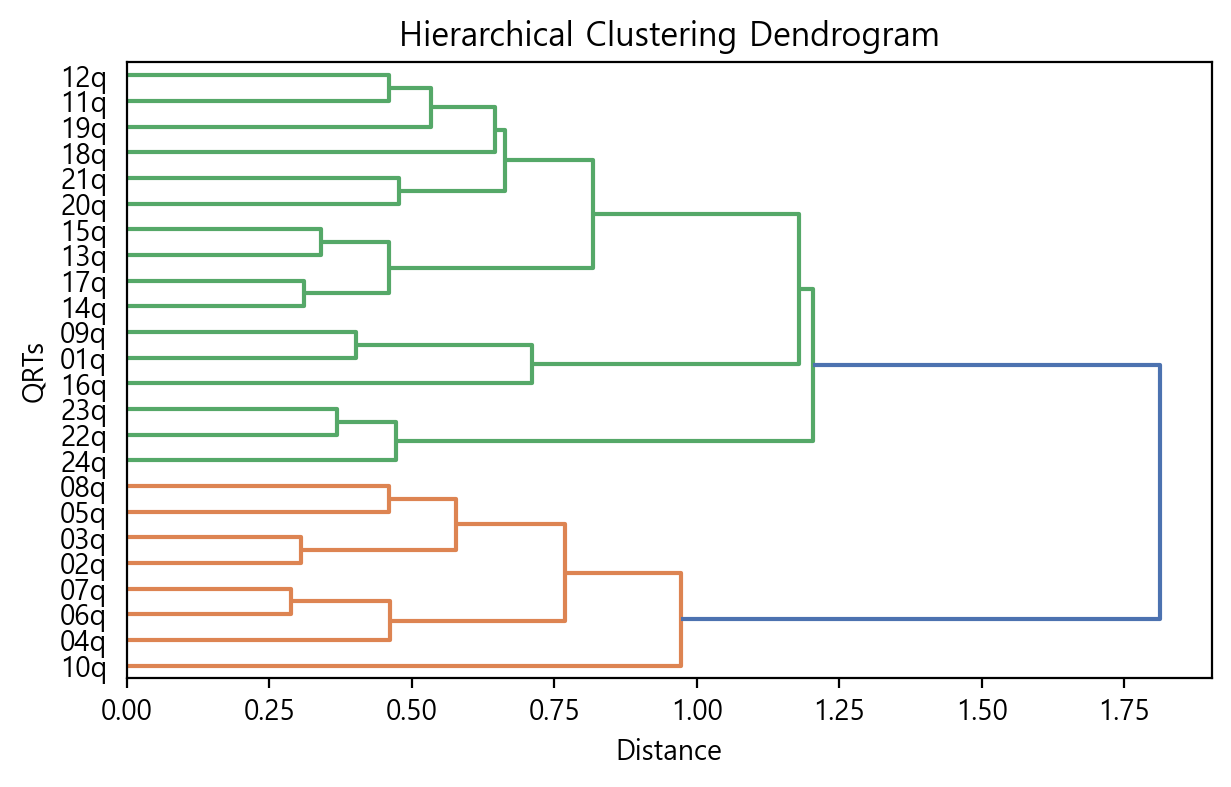

In [12]:
# 함수 호출
hierarchical_clustering(grid_sim, num_clusters=2)  # 군집 수를 필요에 따라 변경 가능

3개의 군집 결과:
01q: Cluster 3
02q: Cluster 1
03q: Cluster 1
04q: Cluster 1
05q: Cluster 1
06q: Cluster 1
07q: Cluster 1
08q: Cluster 1
09q: Cluster 3
10q: Cluster 1
11q: Cluster 3
12q: Cluster 3
13q: Cluster 3
14q: Cluster 3
15q: Cluster 3
16q: Cluster 3
17q: Cluster 3
18q: Cluster 3
19q: Cluster 3
20q: Cluster 3
21q: Cluster 3
22q: Cluster 2
23q: Cluster 2
24q: Cluster 2


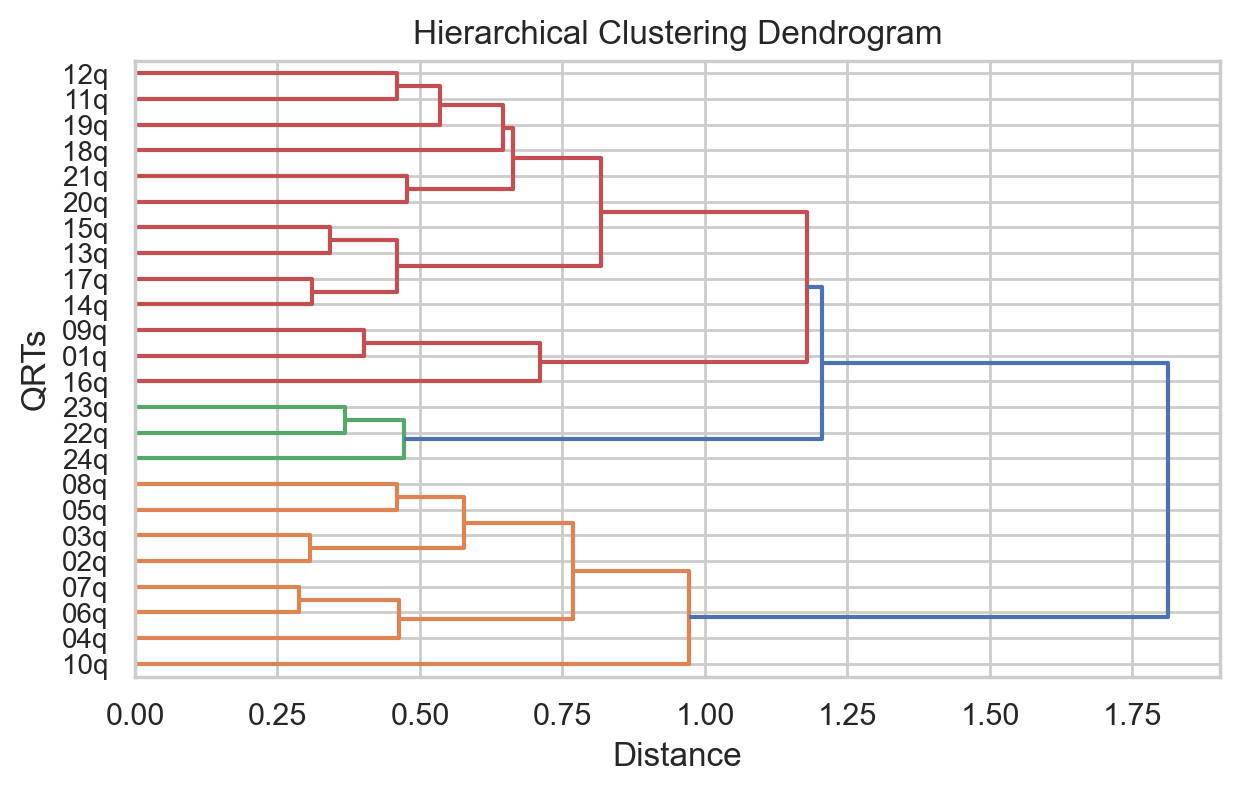

In [13]:
# 함수 호출
hierarchical_clustering(grid_sim, num_clusters=3)  # 군집 수를 필요에 따라 변경 가능

# 시기구분 정보 삽입
- gb_df에 삽입
- 1기는 01q-10q, 2기는 11q-21q, 3기는 22q-24q

In [14]:
gb_df.head(3)

,sent_id,sent_raw,sent_split,r_no,title,writer,w_new,ho_no,year,month,grid_1
0,1,創刊辭,창간 辭,1,創刊辭,-,uk01,1,1920,6,01q
1,2,强者도 부르짖고 弱者도 부르짖으며 優者도 부르짖고 劣者도 부르짖도다,강자 약자 優者 劣者,1,創刊辭,-,uk01,1,1920,6,01q
2,3,東西南北 四海八方이 다같이 소리中에 묻혀 있도다,동서 남북 사해 팔방 소리,1,創刊辭,-,uk01,1,1920,6,01q


In [17]:
# 기간을 정의합니다.
periods = {
    'p1': ['{:02d}q'.format(i) for i in range(1, 11)],  # 01q ~ 10q
    'p2': ['{:02d}q'.format(i) for i in range(11, 22)], # 11q ~ 21q
    'p3': ['{:02d}q'.format(i) for i in range(22, 25)]  # 22q ~ 24q
}

# 기간에 따라 'period' 열을 업데이트합니다.
for period_label, period_values in periods.items():
    gb_df.loc[gb_df['grid_1'].isin(period_values), 'period'] = period_label

# 결과 확인
gb_df

,sent_id,sent_raw,sent_split,r_no,title,writer,w_new,ho_no,year,month,grid_1,period
0,1,創刊辭,창간 辭,1,創刊辭,-,uk01,1,1920,6,01q,p1
1,2,强者도 부르짖고 弱者도 부르짖으며 優者도 부르짖고 劣者도 부르짖도다,강자 약자 優者 劣者,1,創刊辭,-,uk01,1,1920,6,01q,p1
2,3,東西南北 四海八方이 다같이 소리中에 묻혀 있도다,동서 남북 사해 팔방 소리,1,創刊辭,-,uk01,1,1920,6,01q,p1
3,4,霹靂이냐 地震이냐 神籟이냐 魔哭이냐 우리는 아즉 이 소리의 正邪를 判斷할 수 없도다,소리 판단,1,創刊辭,-,uk01,1,1920,6,01q,p1
4,5,左右間 多數가 渴仰하고 多數가 要求하는 人民의 소리임은 明白하도다,좌우 間 다수 갈앙 다수 요구 인민 소리 명백,1,創刊辭,-,uk01,1,1920,6,01q,p1
...,...,...,...,...,...,...,...,...,...,...,...,...
34025,34026,어떠케 되엿던지 만약 미국과 영국간에 전쟁이 生起인다면 영국의 또미니온인 캐나다는 ...,미국 영국 전쟁 生起 영국 캐나다 미국 양식 힘 영국,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,쇠뫼 譯,김철산,72,1926,8,24q,p3
34026,34027,이 비밀은 여러분과 나 외에 또 政客 셋이 알고 잇음니다,비밀 정객,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,쇠뫼 譯,김철산,72,1926,8,24q,p3
34027,34028,그것은 미국과 영국과 캐나다임니다,미국 영국 캐나다,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,쇠뫼 譯,김철산,72,1926,8,24q,p3
34028,34029,미국의 물질적 권력은 대개 이러함니다,미국 물질 권력,334,유로빠와 아메리카(一) 금년 봄에 모쓰크바 엑쓰페리멘탈 劇場에서 한 「트로츠끼」의 講演.,쇠뫼 譯,김철산,72,1926,8,24q,p3


In [18]:
gb_df.to_csv('result/gb_df.txt', sep='\t', index=False)

# The End of Note